# Übergangswahrscheinlichkeiten
###  Bestimme relative Übergangswahrscheinlichkeiten vom Zustand Zuhause an Werktagen in Abhängigkeit des Zeitschrittes

### Zustände

* Zuhause -> 1
* Arbeit -> 2 
* Einkaufen -> 3 
* Freizeit -> 4
* Sonstiges -> 5

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Rohdaten\NHTS_trips_processed.csv"

df = pd.read_csv(path)

In [3]:
df.head()

,ID,Type_day,TRPTRANS,Trip_no,Whyfrom,Whyto,Distance,Trip_duration,Departure_hhmm,Arrival_hhmm,Departure,Arrival,Departure_t
0,300000071,1,3,1,1,4,8.439,15,1000,1015,600,615,40
1,300000071,1,3,2,4,1,8.286,20,1510,1530,910,930,61
2,300000073,1,3,1,1,2,3.621,15,845,900,525,540,35
3,300000073,1,3,2,2,1,3.610,15,1430,1445,870,885,58
4,300000081,4,6,1,1,2,12.902,15,1115,1130,675,690,45


## Beschränkung auf Werktage

In [4]:
filt = df["Type_day"] < 6
df = df[filt]

In [5]:
df["Type_day"].value_counts()

5    125066
4    121606
3    119592
2    119423
1    110593
Name: Type_day, dtype: int64

## Filtern nach Ausgangszuständen

In [6]:
zuhause = df[df["Whyfrom"]==1]

arbeit = df[df["Whyfrom"]==2]

einkaufen = df[df["Whyfrom"]==3]

freizeit = df[df["Whyfrom"]==4]

sonstiges = df[df["Whyfrom"]==5]


In [7]:
# Vernachlässige Rundreisen
zuhause = zuhause[zuhause["Whyto"] != 1]
arbeit = arbeit[arbeit["Whyto"] != 2]
einkaufen = einkaufen[einkaufen["Whyto"] != 3]
freizeit = freizeit[freizeit["Whyto"] != 4]
sonstiges = sonstiges[sonstiges["Whyto"] != 5]

## Gruppieren der Trips nach Zeitschritt des Wegbeginns

In [8]:
zuhause_grpd = zuhause.groupby(["Departure_t"])
arbeit_grpd = arbeit.groupby(["Departure_t"])
einkaufen_grpd = einkaufen.groupby(["Departure_t"])
freizeit_grpd = freizeit.groupby(["Departure_t"])
sonstiges_grpd = sonstiges.groupby(["Departure_t"])

## Zuordnen der relativen Übergangswahrscheinlichkeiten zu den anderen Zuständen in jedem Zeitschritt

In [9]:
zuhause_arbeit = [0 for i in range(97)]
zuhause_einkaufen = [0 for i in range(97)]
zuhause_freizeit = [0 for i in range(97)]
zuhause_sonstiges = [0 for i in range(97)]

arbeit_zuhause = [0 for i in range(97)]
arbeit_einkaufen = [0 for i in range(97)]
arbeit_freizeit = [0 for i in range(97)]
arbeit_sonstiges = [0 for i in range(97)]

einkaufen_arbeit = [0 for i in range(97)]
einkaufen_zuhause = [0 for i in range(97)]
einkaufen_freizeit = [0 for i in range(97)]
einkaufen_sonstiges = [0 for i in range(97)]

freizeit_arbeit = [0 for i in range(97)]
freizeit_einkaufen = [0 for i in range(97)]
freizeit_zuhause = [0 for i in range(97)]
freizeit_sonstiges = [0 for i in range(97)]

sonstiges_arbeit = [0 for i in range(97)]
sonstiges_einkaufen = [0 for i in range(97)]
sonstiges_freizeit = [0 for i in range(97)]
sonstiges_zuhause = [0 for i in range(97)]

In [10]:
# zähle relative Häufigkeit der Trips zum gegebenen Zustand in Zeitschritt t
for t, group in zuhause_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(2):
        zuhause_arbeit[t] = counts.get(2)
    if counts.get(3):
        zuhause_einkaufen[t] = counts.get(3)
    if counts.get(4):
        zuhause_freizeit[t] = counts.get(4)
    if counts.get(5):
        zuhause_sonstiges[t] = counts.get(5)

In [11]:
for t, group in arbeit_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        arbeit_zuhause[t] = counts.get(1)
    if counts.get(3):
        arbeit_einkaufen[t] = counts.get(3)
    if counts.get(4):
        arbeit_freizeit[t] = counts.get(4)
    if counts.get(5):
        arbeit_sonstiges[t] = counts.get(5)

In [12]:
for t, group in einkaufen_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        einkaufen_zuhause[t] = counts.get(1)
    if counts.get(2):
        einkaufen_arbeit[t] = counts.get(2)
    if counts.get(4):
        einkaufen_freizeit[t] = counts.get(4)
    if counts.get(5):
        einkaufen_sonstiges[t] = counts.get(5)

In [13]:
for t, group in freizeit_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        freizeit_zuhause[t] = counts.get(1)
    if counts.get(2):
        freizeit_arbeit[t] = counts.get(2)
    if counts.get(3):
        freizeit_einkaufen[t] = counts.get(3)
    if counts.get(5):
        freizeit_sonstiges[t] = counts.get(5)

In [14]:
for t, group in sonstiges_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        sonstiges_zuhause[t] = counts.get(1)
    if counts.get(2):
        sonstiges_arbeit[t] = counts.get(2)
    if counts.get(3):
        sonstiges_einkaufen[t] = counts.get(3)
    if counts.get(4):
        sonstiges_freizeit[t] = counts.get(4)

## Visualisierung

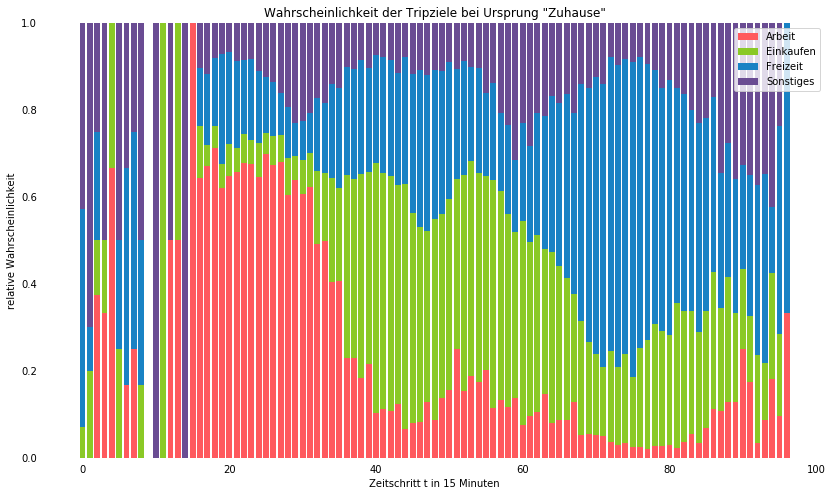

In [15]:
plt.figure(figsize=(14,8))
x = np.linspace(0,96, 97)
plt.bar(x, zuhause_arbeit, label="Arbeit", color='#FF595E');
plt.bar(x, zuhause_einkaufen, bottom=zuhause_arbeit, label="Einkaufen", color='#8AC926');
plt.bar(x, zuhause_freizeit, bottom=[i+j for i,j in zip(zuhause_arbeit,zuhause_einkaufen)], label="Freizeit", color='#1982C4');
plt.bar(x, zuhause_sonstiges, bottom=[i+j+k for i,j,k in zip(zuhause_arbeit,zuhause_einkaufen,zuhause_freizeit)], label="Sonstiges", color='#6A4C93');
plt.xlabel("Zeitschritt t in 15 Minuten")
plt.ylabel("relative Wahrscheinlichkeit")
plt.box(on=None)
plt.title("Wahrscheinlichkeit der Tripziele bei Ursprung \"Zuhause\"");
plt.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=True)
plt.legend();


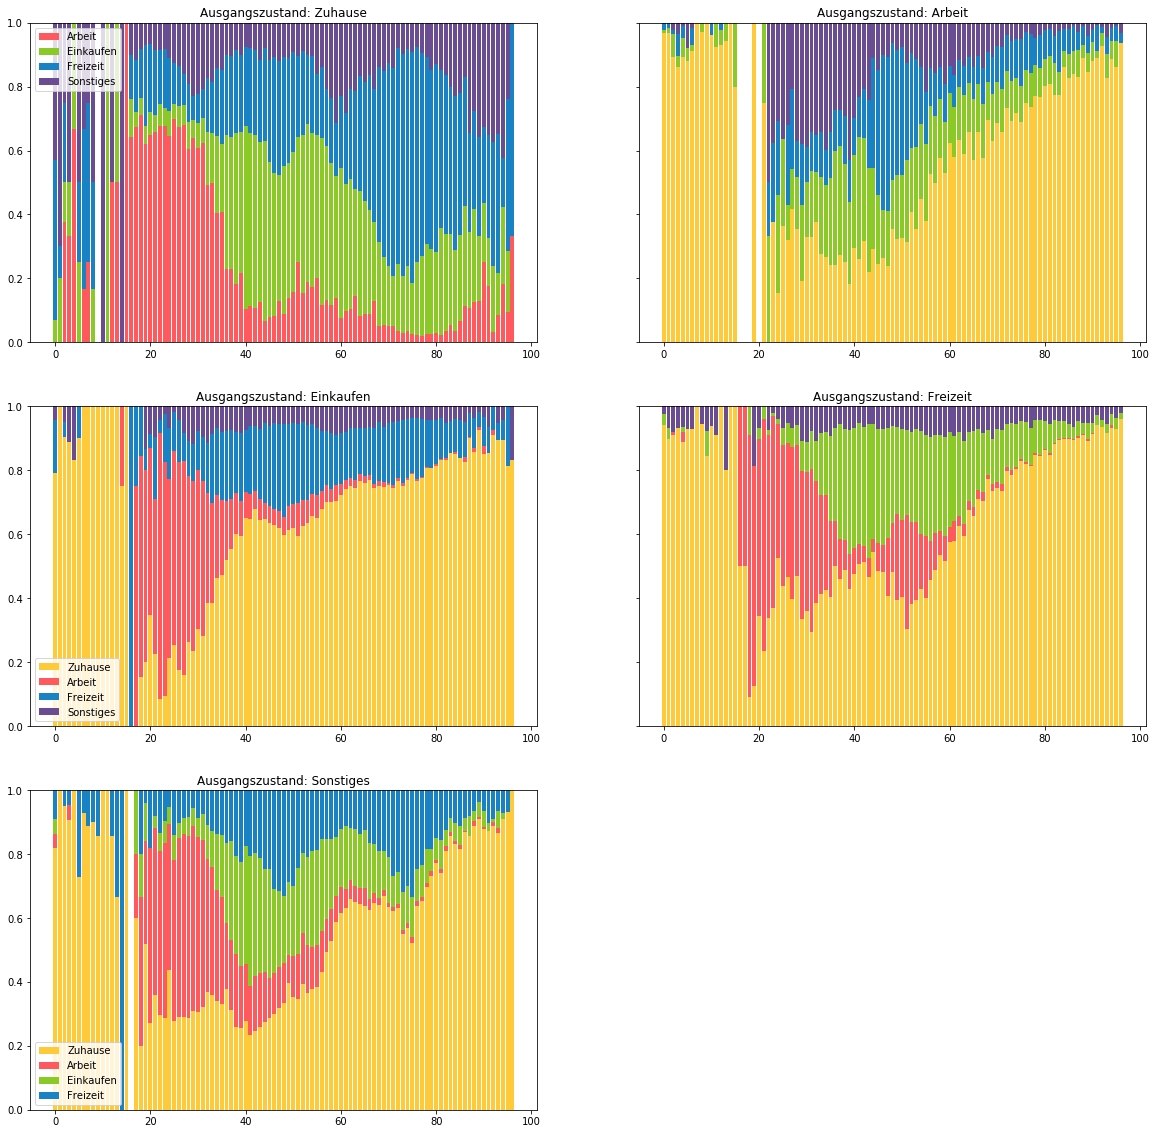

In [16]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20), sharey=True)
x = np.linspace(0,96, 97)
ax1.bar(x, zuhause_arbeit, label="Arbeit", color='#FF595E');
ax1.bar(x, zuhause_einkaufen, bottom=zuhause_arbeit, label="Einkaufen", color='#8AC926');
ax1.bar(x, zuhause_freizeit, bottom=[i+j for i,j in zip(zuhause_arbeit,zuhause_einkaufen)], label="Freizeit", color='#1982C4');
ax1.bar(x, zuhause_sonstiges, bottom=[i+j+k for i,j,k in zip(zuhause_arbeit,zuhause_einkaufen,zuhause_freizeit)], label="Sonstiges", color='#6A4C93');
ax1.set_title("Ausgangszustand: Zuhause")
ax1.legend()

ax2.bar(x, arbeit_zuhause, label="Zuhause", color='#FFCA3A');
ax2.bar(x, arbeit_einkaufen, bottom=arbeit_zuhause, label="Einkaufen", color='#8AC926');
ax2.bar(x, arbeit_freizeit, bottom=[i+j for i,j in zip(arbeit_zuhause,arbeit_einkaufen)], label="Freizeit", color='#1982C4');
ax2.bar(x, arbeit_sonstiges, bottom=[i+j+k for i,j,k in zip(arbeit_zuhause,arbeit_einkaufen,arbeit_freizeit)], label="Sonstiges", color='#6A4C93')
ax2.set_title("Ausgangszustand: Arbeit")

ax3.bar(x, einkaufen_zuhause, label="Zuhause", color='#FFCA3A');
ax3.bar(x, einkaufen_arbeit, bottom=einkaufen_zuhause, label="Arbeit", color='#FF595E');
ax3.bar(x, einkaufen_freizeit, bottom=[i+j for i,j in zip(einkaufen_zuhause,einkaufen_arbeit)], label="Freizeit", color='#1982C4');
ax3.bar(x, einkaufen_sonstiges, bottom=[i+j+k for i,j,k in zip(einkaufen_zuhause,einkaufen_arbeit,einkaufen_freizeit)], label="Sonstiges", color='#6A4C93')
ax3.set_title("Ausgangszustand: Einkaufen")
ax3.legend()

ax4.bar(x, freizeit_zuhause, label="Zuhause", color='#FFCA3A');
ax4.bar(x, freizeit_arbeit, bottom=freizeit_zuhause, label="Arbeit", color='#FF595E');
ax4.bar(x, freizeit_einkaufen, bottom=[i+j for i,j in zip(freizeit_zuhause,freizeit_arbeit)], label="Einkaufen", color='#8AC926');
ax4.set_title("Ausgangszustand: Freizeit")
ax4.bar(x, freizeit_sonstiges, bottom=[i+j+k for i,j,k in zip(freizeit_zuhause,freizeit_arbeit,freizeit_einkaufen)], label="Sonstiges", color='#6A4C93')

ax5.bar(x, sonstiges_zuhause, label="Zuhause", color='#FFCA3A');
ax5.bar(x, sonstiges_arbeit, bottom=sonstiges_zuhause, label="Arbeit", color='#FF595E');
ax5.bar(x, sonstiges_einkaufen, bottom=[i+j for i,j in zip(sonstiges_zuhause,sonstiges_arbeit)], label="Einkaufen", color='#8AC926');
ax5.bar(x, sonstiges_freizeit, bottom=[i+j+k for i,j,k in zip(sonstiges_zuhause,sonstiges_arbeit,sonstiges_einkaufen)], label="Freizeit", color='#1982C4')
ax5.set_title("Ausgangszustand: Sonstiges")
ax5.legend()

fig.delaxes(ax6)

## Umgang mit fehlenden Übergangswahrscheinlichkeiten

In [17]:
tp_zuhause = [[0 for i in range(97)] for i in range(4)]
tp_arbeit = [[0 for i in range(97)] for i in range(4)]
tp_einkaufen = [[0 for i in range(97)] for i in range(4)]
tp_freizeit = [[0 for i in range(97)] for i in range(4)]
tp_sonstiges = [[0 for i in range(97)] for i in range(4)]

In [18]:
# zähle relative Häufigkeit der Trips zum gegebenen Zustand in Zeitschritt t
for t, group in zuhause_grpd:
    counts = group["Whyto"].value_counts()
    if counts.get(2):
        tp_zuhause[0][t] = counts.get(2)
        # zuhause_arbeit[t] = counts.get(2)
    if counts.get(3):
        tp_zuhause[1][t] = counts.get(3)
        # zuhause_einkaufen[t] = counts.get(3)
    if counts.get(4):
        tp_zuhause[2][t] = counts.get(4)
        #zuhause_freizeit[t] = counts.get(4)
    if counts.get(5):
        tp_zuhause[3][t] = counts.get(5)
        #zuhause_sonstiges[t] = counts.get(5)

In [19]:
for t, group in arbeit_grpd:
    counts = group["Whyto"].value_counts()
    if counts.get(1):
        tp_arbeit[0][t] = counts.get(1)
    if counts.get(3):
        tp_arbeit[1][t] = counts.get(3)
    if counts.get(4):
        tp_arbeit[2][t] = counts.get(4)
    if counts.get(5):
        tp_arbeit[3][t] = counts.get(5)

In [20]:
for t, group in einkaufen_grpd:
    counts = group["Whyto"].value_counts()
    if counts.get(1):
        tp_einkaufen[0][t] = counts.get(1)
    if counts.get(2):
        tp_einkaufen[1][t] = counts.get(2)
    if counts.get(4):
        tp_einkaufen[2][t] = counts.get(4)
    if counts.get(5):
        tp_einkaufen[3][t] = counts.get(5)

In [21]:
for t, group in freizeit_grpd:
    counts = group["Whyto"].value_counts()
    if counts.get(1):
        tp_freizeit[0][t] = counts.get(1)
    if counts.get(2):
        tp_freizeit[1][t] = counts.get(2)
    if counts.get(3):
        tp_freizeit[2][t] = counts.get(3)
    if counts.get(5):
        tp_freizeit[3][t] = counts.get(5)

In [22]:
for t, group in sonstiges_grpd:
    counts = group["Whyto"].value_counts()
    if counts.get(1):
        tp_sonstiges[0][t] = counts.get(1)
    if counts.get(2):
        tp_sonstiges[1][t] = counts.get(2)
    if counts.get(3):
        tp_sonstiges[2][t] = counts.get(3)
    if counts.get(4):
        tp_sonstiges[3][t] = counts.get(4)

In [23]:
# Anpassen der Übergangswahrscheinlichkeiten im übergebenen Intervall -> mitteln der Werte über 3 Perioden (45 Minuten)
def adjust_probabilities(tps, end, start=0):
    
    def adjust(tp_i):
        for t in range(start, end):
            for tp_ij in tp_i:
                tp_ij[t] = calc_interval_average(tp_ij, t)
                
    for tp_i in tps:
        adjust(tp_i)

In [24]:
# Berechnen der mittleren Anzahl von Trips in aktueller, der vorherigen und der nächsten Periode
def calc_interval_average(data, t):
    if t == 0:
        interval_sum = data[96] + data[0] + data[1]
    else:
        interval_sum = 0
        for j in range(-1, 2):
            interval_sum += data[t+j]
    interval_average = interval_sum / 3
    return interval_average
        
# Normieren der Trips in Periode t auf Anteil an gesamten Trips in Periode t
def normalize(tps):
    for tp_i in tps:
        for t in range(97):
            total = sum([tp_ij[t] for tp_ij in tp_i])
            if total != 0:
                for tp_ij in tp_i:
                    tp_ij[t] = tp_ij[t] / total


In [25]:
# Anpassen der Wahrscheinlichkeiten in den ersten 20 Perioden (über 3 periodige Mittelwerte)
adjust_probabilities([tp_zuhause, tp_arbeit, tp_einkaufen, tp_freizeit, tp_sonstiges], 20)
normalize([tp_zuhause, tp_arbeit, tp_einkaufen, tp_freizeit, tp_sonstiges])

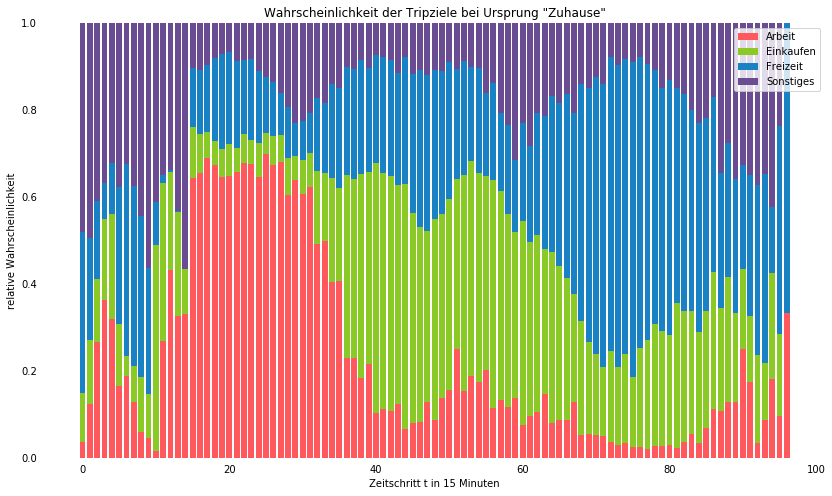

In [26]:
plt.figure(figsize=(14,8))
x = np.linspace(0,96, 97)
plt.bar(x, tp_zuhause[0], label="Arbeit", color='#FF595E');
plt.bar(x, tp_zuhause[1], bottom=tp_zuhause[0], label="Einkaufen", color='#8AC926');
plt.bar(x, tp_zuhause[2], bottom=[i+j for i,j in zip(tp_zuhause[0], tp_zuhause[1])], label="Freizeit", color='#1982C4');
plt.bar(x, tp_zuhause[3], bottom=[i+j+k for i,j,k in zip(tp_zuhause[0], tp_zuhause[1], tp_zuhause[2])], label="Sonstiges", color='#6A4C93');
plt.xlabel("Zeitschritt t in 15 Minuten")
plt.ylabel("relative Wahrscheinlichkeit")
plt.box(on=None)
plt.title("Wahrscheinlichkeit der Tripziele bei Ursprung \"Zuhause\"");
plt.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=True)
plt.legend();

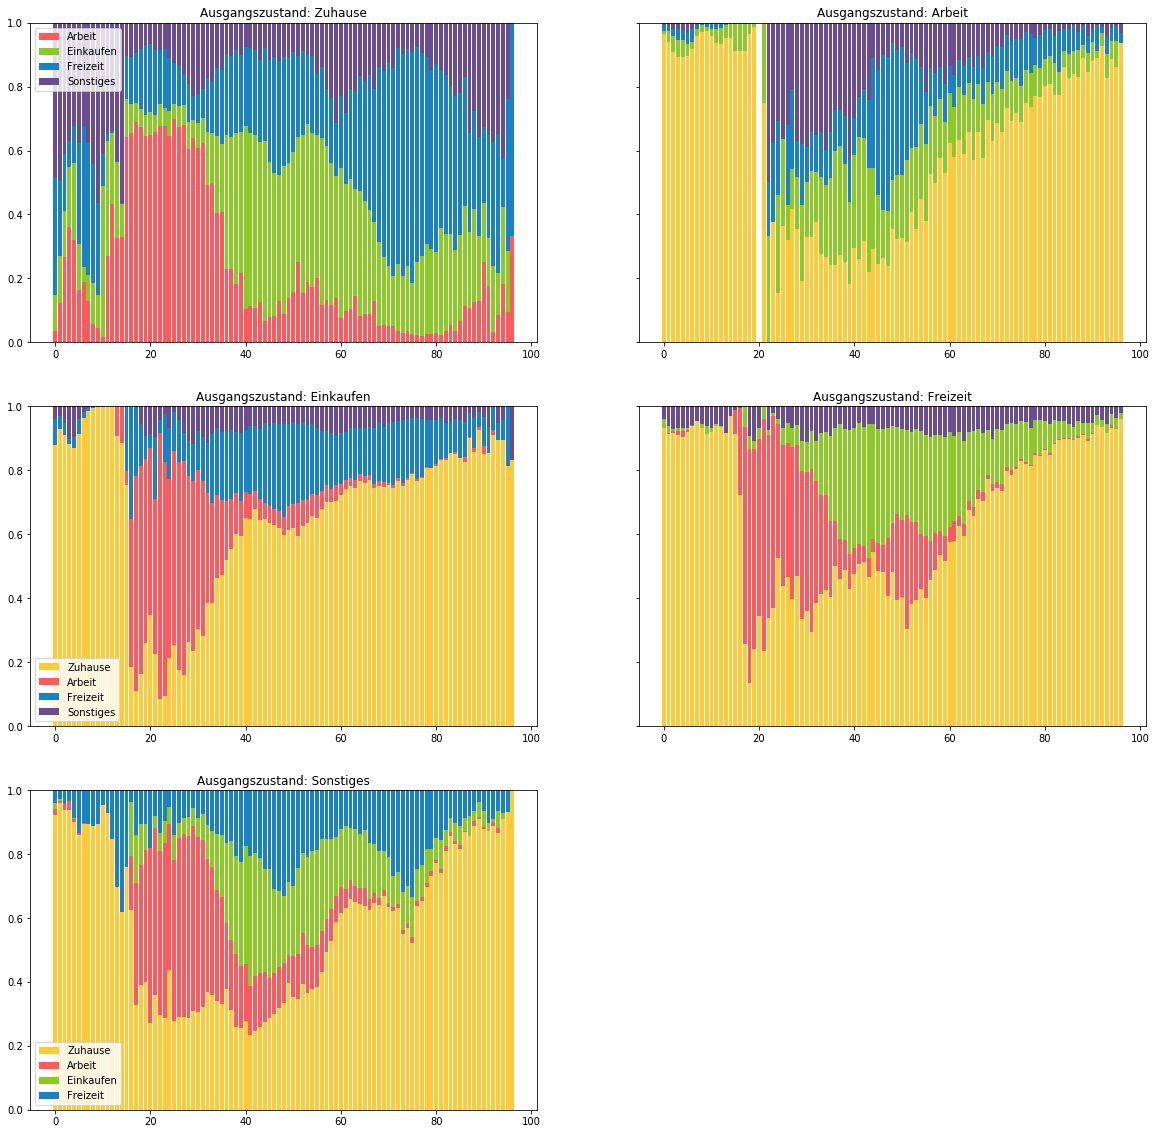

In [27]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20), sharey=True)
x = np.linspace(0,96, 97)
ax1.bar(x, tp_zuhause[0], label="Arbeit", color='#FF595E');
ax1.bar(x, tp_zuhause[1], bottom=tp_zuhause[0], label="Einkaufen", color='#8AC926');
ax1.bar(x, tp_zuhause[2], bottom=[i+j for i,j in zip(tp_zuhause[0], tp_zuhause[1])], label="Freizeit", color='#1982C4');
ax1.bar(x, tp_zuhause[3], bottom=[i+j+k for i,j,k in zip(tp_zuhause[0], tp_zuhause[1], tp_zuhause[2])], label="Sonstiges", color='#6A4C93');
ax1.set_title("Ausgangszustand: Zuhause")
ax1.legend()

ax2.bar(x, tp_arbeit[0], label="Zuhause", color='#FFCA3A');
ax2.bar(x, tp_arbeit[1], bottom=tp_arbeit[0], label="Einkaufen", color='#8AC926');
ax2.bar(x, tp_arbeit[2], bottom=[i+j for i,j in zip(tp_arbeit[0], tp_arbeit[1])], label="Freizeit", color='#1982C4');
ax2.bar(x, tp_arbeit[3], bottom=[i+j+k for i,j,k in zip(tp_arbeit[0], tp_arbeit[1], tp_arbeit[2])], label="Sonstiges", color='#6A4C93');
ax2.set_title("Ausgangszustand: Arbeit")

ax3.bar(x, tp_einkaufen[0], label="Zuhause", color='#FFCA3A');
ax3.bar(x, tp_einkaufen[1], bottom=tp_einkaufen[0], label="Arbeit", color='#FF595E');
ax3.bar(x, tp_einkaufen[2], bottom=[i+j for i,j in zip(tp_einkaufen[0], tp_einkaufen[1])], label="Freizeit", color='#1982C4');
ax3.bar(x, tp_einkaufen[3], bottom=[i+j+k for i,j,k in zip(tp_einkaufen[0], tp_einkaufen[1], tp_einkaufen[2])], label="Sonstiges", color='#6A4C93');
ax3.set_title("Ausgangszustand: Einkaufen")
ax3.legend()

ax4.bar(x, tp_freizeit[0], label="Zuhause", color='#FFCA3A');
ax4.bar(x, tp_freizeit[1], bottom=tp_freizeit[0], label="Arbeit", color='#FF595E');
ax4.bar(x, tp_freizeit[2], bottom=[i+j for i,j in zip(tp_freizeit[0], tp_freizeit[1])], label="Einkaufen", color='#8AC926');
ax4.bar(x, tp_freizeit[3], bottom=[i+j+k for i,j,k in zip(tp_freizeit[0], tp_freizeit[1], tp_freizeit[2])], label="Sonstiges", color='#6A4C93');
ax4.set_title("Ausgangszustand: Freizeit")

ax5.bar(x, tp_sonstiges[0], label="Zuhause", color='#FFCA3A');
ax5.bar(x, tp_sonstiges[1], bottom=tp_sonstiges[0], label="Arbeit", color='#FF595E');
ax5.bar(x, tp_sonstiges[2], bottom=[i+j for i,j in zip(tp_sonstiges[0], tp_sonstiges[1])], label="Einkaufen", color='#8AC926');
ax5.bar(x, tp_sonstiges[3], bottom=[i+j+k for i,j,k in zip(tp_sonstiges[0], tp_sonstiges[1], tp_sonstiges[2])], label="Freizeit", color='#1982C4');
ax5.set_title("Ausgangszustand: Sonstiges")
ax5.legend()

fig.delaxes(ax6)

## Ermitteln von Werten für fehlende Übergangswahrscheinlichkeiten

In [28]:
# Ermittle Summe der Übergangswahrscheinlichkeiten in Zeitschritt
def tp_sum(tp_i, t):
    res = 0
    for tp_ij in tp_i:
        res += tp_ij[t]
    return res

# Skalieren der Werte auf 1
def scale_up(tp_i, t):
    factor = sum([tp_ij[t] for tp_ij in tp_i])
    for tp_ij in tp_i:
        tp_ij[t] = tp_ij[t] / factor

In [29]:
# Wenn ÜW in Zeitschritt fehlt ersetze diesen durch das Mittel der umliegenden Perioden
for tp in [tp_zuhause, tp_arbeit, tp_einkaufen, tp_freizeit, tp_sonstiges]:
    for t in range(97):
        if tp_sum(tp, t) == 0:
            adjust_probabilities([tp], start=t, end=t+1)
            scale_up(tp, t)

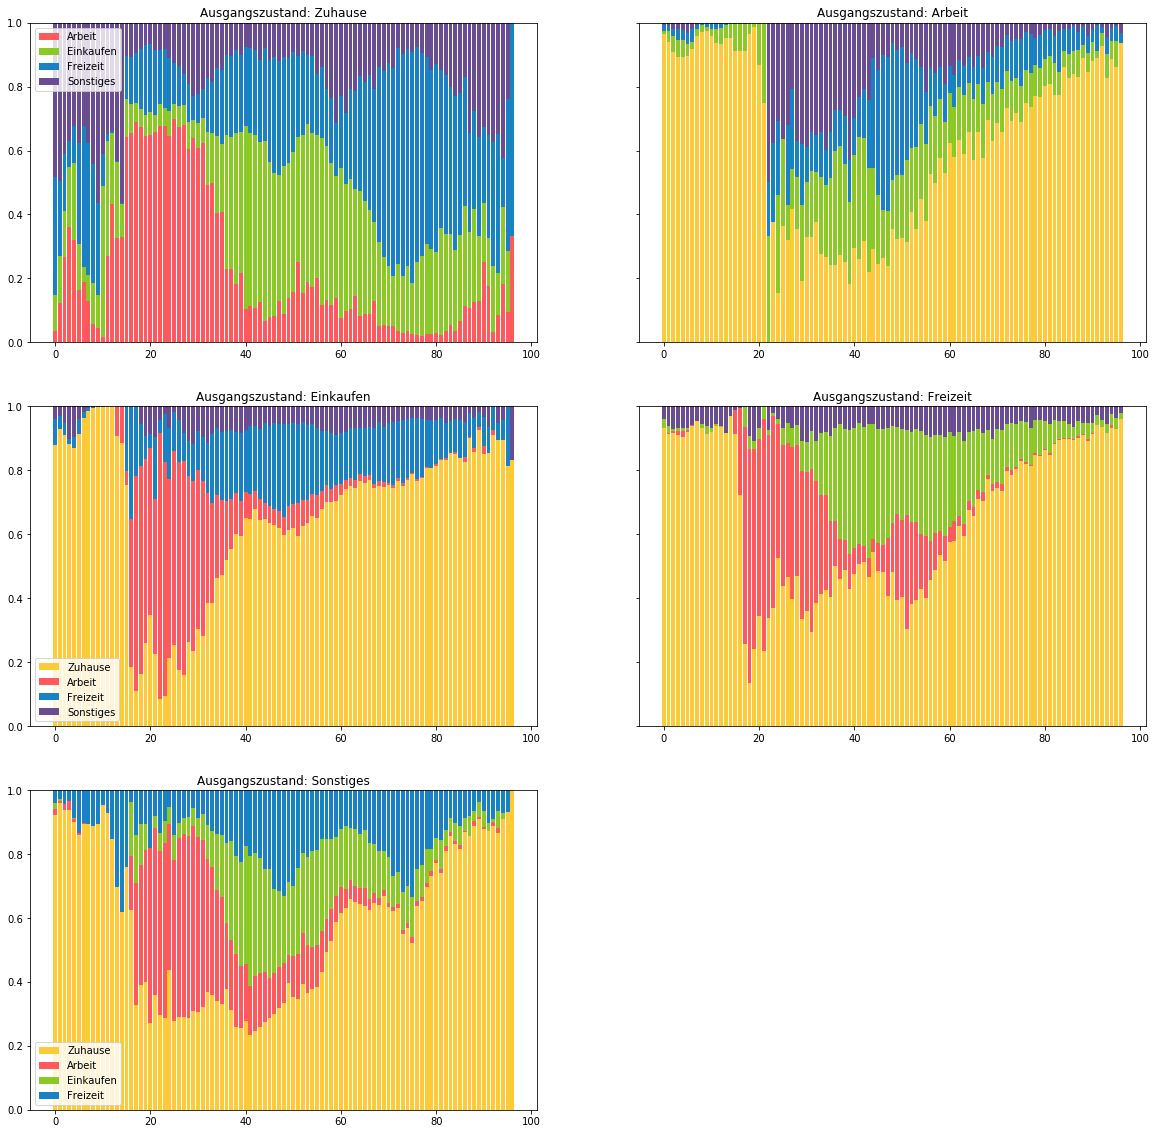

In [30]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20), sharey=True)
x = np.linspace(0,96, 97)
ax1.bar(x, tp_zuhause[0], label="Arbeit", color='#FF595E');
ax1.bar(x, tp_zuhause[1], bottom=tp_zuhause[0], label="Einkaufen", color='#8AC926');
ax1.bar(x, tp_zuhause[2], bottom=[i+j for i,j in zip(tp_zuhause[0], tp_zuhause[1])], label="Freizeit", color='#1982C4');
ax1.bar(x, tp_zuhause[3], bottom=[i+j+k for i,j,k in zip(tp_zuhause[0], tp_zuhause[1], tp_zuhause[2])], label="Sonstiges", color='#6A4C93');
ax1.set_title("Ausgangszustand: Zuhause")
ax1.legend()

ax2.bar(x, tp_arbeit[0], label="Zuhause", color='#FFCA3A');
ax2.bar(x, tp_arbeit[1], bottom=tp_arbeit[0], label="Einkaufen", color='#8AC926');
ax2.bar(x, tp_arbeit[2], bottom=[i+j for i,j in zip(tp_arbeit[0], tp_arbeit[1])], label="Freizeit", color='#1982C4');
ax2.bar(x, tp_arbeit[3], bottom=[i+j+k for i,j,k in zip(tp_arbeit[0], tp_arbeit[1], tp_arbeit[2])], label="Sonstiges", color='#6A4C93');
ax2.set_title("Ausgangszustand: Arbeit")

ax3.bar(x, tp_einkaufen[0], label="Zuhause", color='#FFCA3A');
ax3.bar(x, tp_einkaufen[1], bottom=tp_einkaufen[0], label="Arbeit", color='#FF595E');
ax3.bar(x, tp_einkaufen[2], bottom=[i+j for i,j in zip(tp_einkaufen[0], tp_einkaufen[1])], label="Freizeit", color='#1982C4');
ax3.bar(x, tp_einkaufen[3], bottom=[i+j+k for i,j,k in zip(tp_einkaufen[0], tp_einkaufen[1], tp_einkaufen[2])], label="Sonstiges", color='#6A4C93');
ax3.set_title("Ausgangszustand: Einkaufen")
ax3.legend()

ax4.bar(x, tp_freizeit[0], label="Zuhause", color='#FFCA3A');
ax4.bar(x, tp_freizeit[1], bottom=tp_freizeit[0], label="Arbeit", color='#FF595E');
ax4.bar(x, tp_freizeit[2], bottom=[i+j for i,j in zip(tp_freizeit[0], tp_freizeit[1])], label="Einkaufen", color='#8AC926');
ax4.bar(x, tp_freizeit[3], bottom=[i+j+k for i,j,k in zip(tp_freizeit[0], tp_freizeit[1], tp_freizeit[2])], label="Sonstiges", color='#6A4C93');
ax4.set_title("Ausgangszustand: Freizeit")

ax5.bar(x, tp_sonstiges[0], label="Zuhause", color='#FFCA3A');
ax5.bar(x, tp_sonstiges[1], bottom=tp_sonstiges[0], label="Arbeit", color='#FF595E');
ax5.bar(x, tp_sonstiges[2], bottom=[i+j for i,j in zip(tp_sonstiges[0], tp_sonstiges[1])], label="Einkaufen", color='#8AC926');
ax5.bar(x, tp_sonstiges[3], bottom=[i+j+k for i,j,k in zip(tp_sonstiges[0], tp_sonstiges[1], tp_sonstiges[2])], label="Freizeit", color='#1982C4');
ax5.set_title("Ausgangszustand: Sonstiges")
ax5.legend()

fig.delaxes(ax6)

## Speichern Ergebnisse

In [31]:
tp_zuhause_final = [[i,j,k,l] for i, j, k, l in zip(tp_zuhause[0], tp_zuhause[1], tp_zuhause[2], tp_zuhause[3])]
tp_arbeit_final = [[i,j,k,l] for i, j, k, l in zip(tp_arbeit[0], tp_arbeit[1], tp_arbeit[2], tp_arbeit[3])]
tp_einkaufen_final = [[i,j,k,l] for i, j, k, l in zip(tp_einkaufen[0], tp_einkaufen[1], tp_einkaufen[2], tp_einkaufen[3])]
tp_freizeit_final = [[i,j,k,l] for i, j, k, l in zip(tp_freizeit[0], tp_freizeit[1], tp_freizeit[2], tp_freizeit[3])]
tp_sonstiges_final = [[i,j,k,l] for i, j, k, l in zip(tp_sonstiges[0], tp_sonstiges[1], tp_sonstiges[2], tp_sonstiges[3])]

tp_final = [tp_zuhause_final, tp_arbeit_final, tp_einkaufen_final,tp_freizeit_final, tp_sonstiges_final]

In [32]:
from pathlib import Path
import pickle
import os

root = os.getcwd()+ "\\Simulationsdaten"

if not os.path.exists(root):
    os.makedirs(root)

path = root+"\\Übergangswahrscheinlichkeiten.pickle"

pickle.dump(tp_final, open(path, "wb"))

In [33]:
 os.getcwd()

'C:\\Users\\thoma\\Desktop\\ev-modelling-repo\\Datenauswertung\\Werktag'

## Speichert im falschen Ordner -> überprüfen